<h1>Ejercicio Primer modelo de ML</h1>

<h2>Importación de líbrarias</h2>

In [61]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

#librerías de machine learning

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

<h2>Explotación inicial del dataset</h2>

In [9]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [20]:
# Convertir la columna "date" a tipo de dato de fecha
df['date'] = pd.to_datetime(df['date'])

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                     id      date     price  bedrooms  bathrooms  sqft_living  \
id             1.000000  0.005577 -0.016762  0.001286   0.005160    -0.012258   
date           0.005577  1.000000 -0.004357 -0.016800  -0.034410    -0.034559   
price         -0.016762 -0.004357  1.000000  0.308350   0.525138     0.702035   
bedrooms       0.001286 -0.016800  0.308350  1.000000   0.515884     0.576671   
bathrooms      0.005160 -0.034410  0.525138  0.515884   1.000000     0.754665   
sqft_living   -0.012258 -0.034559  0.702035  0.576671   0.754665     1.000000   
sqft_lot      -0.132109  0.006313  0.089661  0.031703   0.087740     0.172826   
floors         0.018525 -0.022491  0.256794  0.175429   0.500653     0.353949   
waterfront    -0.002721  0.001356  0.266369 -0.006582   0.063744     0.103818   
view           0.011592 -0.001800  0.397293  0.079532   0.187737     0.284611   
condition     -0.023783 -0.050769  0.036362  0.028472  -0.124982    -0.058753   
grade          0.008130 -0.0

Text(0.5, 1.0, 'Mapa de Calor de Correlación')

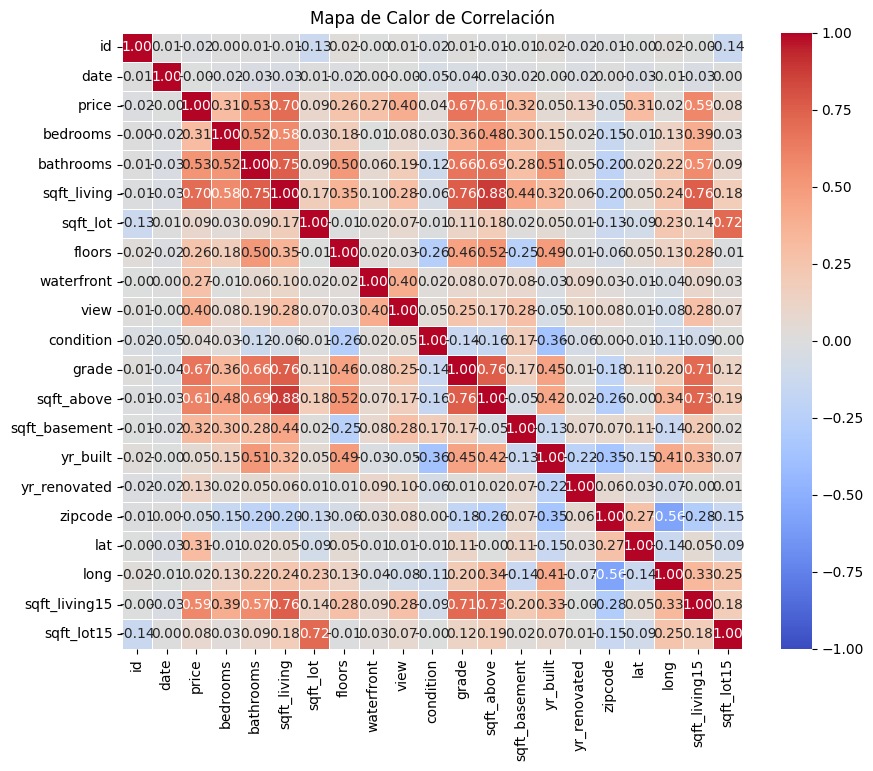

In [22]:
# Crear una figura y un eje
plt.figure(figsize=(10, 8))

# Personalizar el mapa de calor
sns.heatmap(correlation_matrix, vmin=-1., vmax=1., annot=True, cmap='coolwarm',
            linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

# Añadir título
plt.title('Mapa de Calor de Correlación')


<h2>Interpretación de los datos</h2>

id: Un identificador único para cada propiedad.

date: La fecha en que se registraron los datos.

price: El precio de la propiedad, que es la variable objetivo que deseas predecir.

bedrooms: El número de habitaciones en la propiedad.

bathrooms: El número de baños en la propiedad.

sqft_living: El área total (en pies cuadrados) de la parte interior de la propiedad.

sqft_lot: El área total del lote de la propiedad (en pies cuadrados).

floors: El número de pisos de la propiedad.

waterfront: Una indicación binaria si la propiedad tiene vista al agua (1 si sí, 0 si no).

view: Una métrica que indica el nivel de vista de la propiedad.

condition: La condición general de la propiedad.

grade: Una medida de la calidad general de la propiedad.

sqft_above: El área total (en pies cuadrados) de la parte interior de la propiedad, excluyendo el sótano.

sqft_basement: El área total (en pies cuadrados) del sótano de la propiedad.

yr_built: El año de construcción de la propiedad.

yr_renovated: El año en que se renovó la propiedad, si corresponde.

zipcode: El código postal de la ubicación de la propiedad.

lat: La latitud de la ubicación de la propiedad.

long: La longitud de la ubicación de la propiedad.

sqft_living15: El área promedio (en pies cuadrados) de las casas vecinas dentro de un radio de 15 millas.

sqft_lot15: El área promedio del lote (en pies cuadrados) de las casas vecinas dentro de un radio de 15 millas.

<h2>Explotacion de la variable  objetivo</h2>

In [16]:
df["price"].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

c:\users\tania\kc_house_data\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


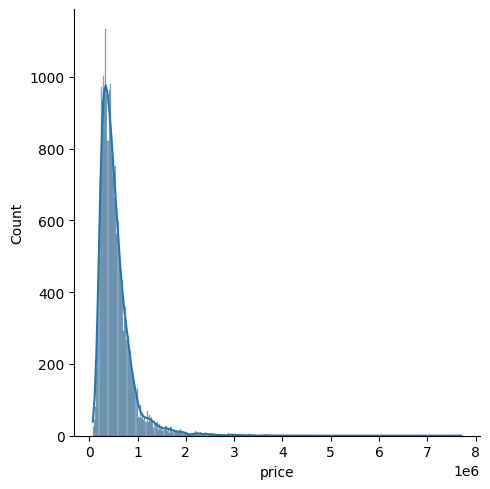

In [17]:
sns.displot(data=df, x="price", kde=True)

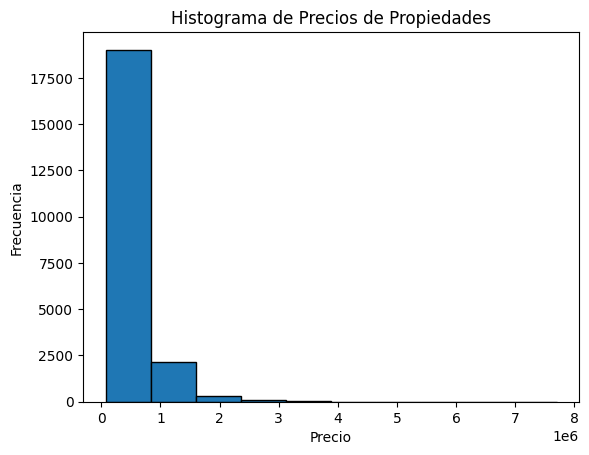

In [18]:
# Extrair valores da coluna "price"
prices = df['price'].values
# Crear el histograma
plt.hist(prices, bins=10, edgecolor='black')

# Agregar título y etiquetas de ejes
plt.title('Histograma de Precios de Propiedades')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


<h2>Manipulación de datos</h2>

In [24]:
df.drop(columns="id", inplace=True)
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


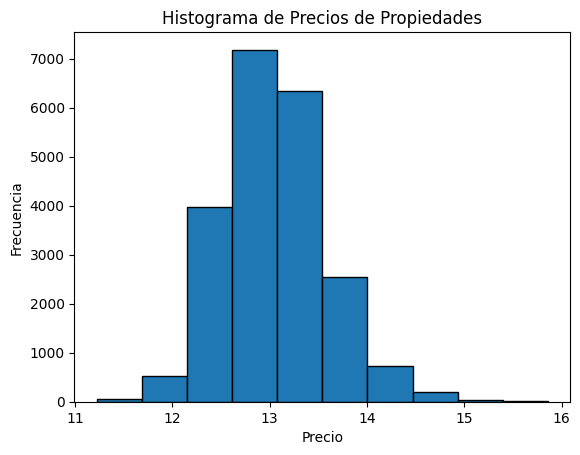

In [26]:
# Transformación logaritmica de los precios para dejar la distribuicion más normal
precios_transformados = np.log(prices)
# Crear el histograma
plt.hist(precios_transformados, bins=10, edgecolor='black')

# Agregar título y etiquetas de ejes
plt.title('Histograma de Precios de Propiedades')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [74]:
df['date'] = pd.to_datetime(df['date'])
y = np.log(df["price"])
X = df.drop(columns=["price","date"])

In [75]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

<h2>Preparación de los datos</h2>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo para regression lineal con precio en transformacion logaritmica

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Realizar Prediciones

In [78]:
y_pred = model.predict(X_test)

## Evaluar el modelo

In [79]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas de evaluación
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calcular el porcentaje de overfitting
overfitting_percentage = ((train_mae - test_mae) / train_mae) * 100

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')
print(f'Porcentaje de Overfitting: {overfitting_percentage:.2f}%')

# Verificar si el overfitting es menor al 5%
if overfitting_percentage < 5:
    print('El modelo tiene un overfitting aceptable.')
else:
    print('El modelo puede tener un overfitting significativo.')

MSE: 0.07
MAE: 0.20
RMSE: 0.26
R2 Score: 0.77
Porcentaje de Overfitting: -0.54%
El modelo tiene un overfitting aceptable.


## Entrenamiento del modelo para regression lineal con precio sin transformacion logaritmica

### Manipulación de los datos

In [63]:
y = df["price"]
X = df.drop(columns=["price","date"])

In [64]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Preparación de los datos

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Realizar Prediciones

In [68]:
y_pred = model.predict(X_test)

### Evaluar el modelo

In [72]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas de evaluación
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calcular el porcentaje de overfitting
overfitting_percentage = ((train_mae - test_mae) / train_mae) * 100

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')
print(f'Porcentaje de Overfitting: {overfitting_percentage:.2f}%')

# Verificar si el overfitting es menor al 5%
if overfitting_percentage < 5:
    print('El modelo tiene un overfitting aceptable.')
else:
    print('El modelo puede tener un overfitting significativo.')

MSE: 45205880540.88
MAE: 127190.23
RMSE: 212616.75
R2 Score: 0.70
Porcentaje de Overfitting: -2.00%
El modelo tiene un overfitting aceptable.
